# K-Means clustering is an unsupervised learning algorithm which aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest centroid. The algorithm aims to minimize the squared Euclidean distances between the observation and the centroid of cluster to which it belongs.

# But sometime K-Means algorithm does not give best results. It is sensitive to outliers. Let us take an example to understand how outliers affect the mean of data using python.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats.mstats import winsorize
from scipy.stats import zscore
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.datasets.samples_generator import make_blobs
from sklearn import metrics

In [6]:
np.__version__

'1.18.5'

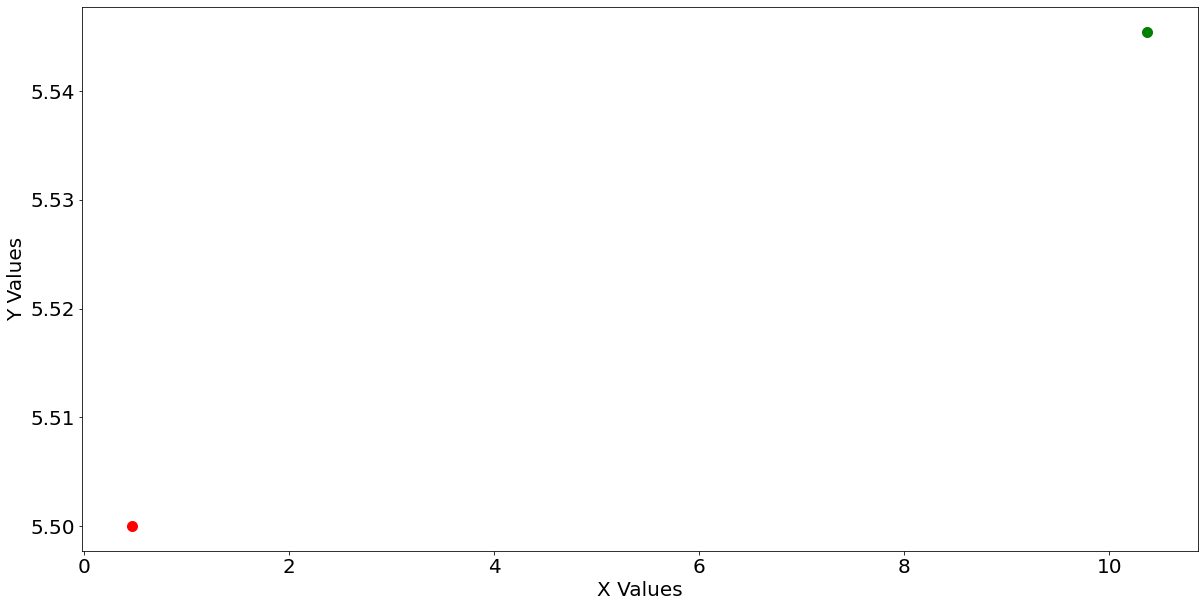

In [7]:
X = list(np.random.rand(100)) # 'X' is a list of 100 random numbers between 0 and 1.
Y = list(np.linspace(1,10,100)) # 'Y' is a list of 100 random numbers equally spaced between 1 and 10.
plt.figure(figsize=(20,10)) # Size of figure is adjusted.
plt.xticks(fontsize=20) # Size of number labels on x-axis is adjusted.
plt.yticks(fontsize=20) # Size of number labels on y-axis is adjusted.
plt.xlabel('X Values',fontsize=20) # x-axis is labelled.
plt.ylabel('Y Values',fontsize=20) # y-axis is labelled.
mean_X = sum(X)/len(X) # 'mean_X' is the mean value of 'X'.
mean_Y = sum(Y)/len(Y) # 'mean_Y' is the mean value of 'Y'.
plt.plot(mean_X,mean_Y,'ro',markersize = 10) # The mean value (mean_X,mean_Y) point is plotted.
outlier = 1000 # An outlier of value 1000.
X.append(outlier) # The outlier is added to 'X'.
Y.append(Y[99] + Y[1] - Y[0]) # An extra number is added to 'Y' such equal spacing still holds.
mean_X_new = sum(X)/len(X) # 'mean_X_new' is new mean value of 'X'.
mean_Y_new = sum(Y)/len(Y) # 'mean_Y_new' is new mean value of 'Y'.
plt.plot(mean_X_new,mean_Y_new,'go',markersize = 10) # The mean value (mean_X,mean_Y) point is plotted in green.

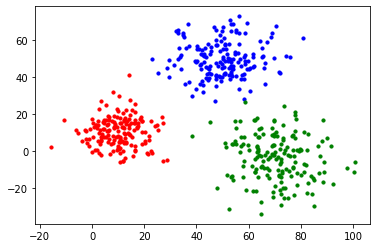

In [8]:
centers = [(10, 10), (50, 50), (70, -5)]
cluster_std = [8, 10, 12]

X, y = make_blobs(n_samples=500, cluster_std=cluster_std, centers=centers, n_features=2, random_state=42)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red", s=10, label="Cluster1")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", s=10, label="Cluster2")
plt.scatter(X[y == 2, 0], X[y == 2, 1], color="green", s=10, label="Cluster3")

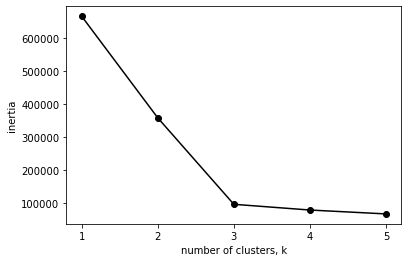

In [9]:
ks = range(1,6)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(X)
    inertias.append(model.inertia_)

    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

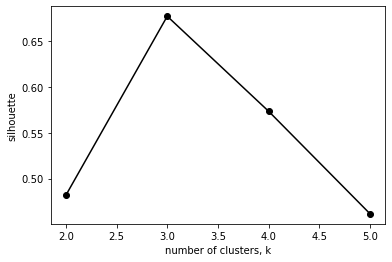

In [10]:
ks = range(2,6)
silhouette = []
for k in ks:
    model = KMeans(n_clusters=k)
    clusters = model.fit_predict(X)
    silhouette.append(metrics.silhouette_score(X, clusters, metric='euclidean'))

    
plt.plot(ks, silhouette, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('silhouette')
plt.show()

In [11]:
labels = KMeans(n_clusters=3, random_state=42).fit_predict(X)
print(metrics.silhouette_score(X, labels, metric='euclidean'))

0.6774848672299741


In [12]:
print(X.shape, y.shape)

(500, 2) (500,)


In [13]:
y[:10]

array([2, 2, 1, 0, 1, 2, 2, 2, 1, 1])

In [14]:
labels[:10]

array([0, 0, 2, 1, 2, 0, 0, 0, 2, 2])

In [ ]:
plt.figure(figsize=(10,5))
colours = ["r","b","g"]
for i in range(X.shape[0]):
    plt.text(X[i,0], X[i,1], str(labels[i]), color=colours[y[i]], fontdict={'weight': 'bold', 'size': 50})
    
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [24]:
X_o = np.append(X, [[0, -20], [0, 60], [30, -20], [100, 60], [-20, 50], [35, -30]], axis=0)
y_o = np.append(y, [3,3,3,3,3,3], axis=0)

print(X_o.shape, y_o.shape)

(506, 2) (506,)


In [25]:
labels2 = KMeans(n_clusters=3, random_state=42).fit_predict(X_o)
print(metrics.silhouette_score(X_o, labels2, metric='euclidean'))

0.6670342772785169


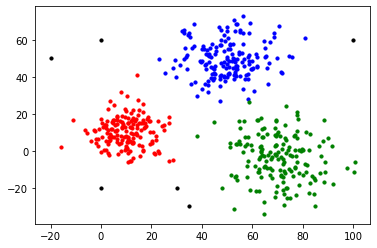

In [27]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red", s=10, label="Cluster1")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", s=10, label="Cluster2")
plt.scatter(X[y == 2, 0], X[y == 2, 1], color="green", s=10, label="Cluster3")
plt.scatter(X_o[y_o == 3, 0], X_o[y_o == 3, 1], color="black", s=10, label="Cluster4")

In [ ]:
#plt.figure(figsize=(10,5))
colours = ["r","b","g"]
for i in range(X.shape[0]):
    plt.text(X[i,0], X[i,1], str(labels[i]), color=colours[y[i]], fontdict={'weight': 'bold', 'size': 50})
plt.show()